# **대구 교통 사고 피해 예측 AI 경진대회 + 어린이 보호구역정보**

In [1]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
# fm.fontManager.ttflist.insert(0, fe)
# plt.rc('font', family='MaruBuri')

from matplotlib.pylab import rcParams
rcParams['font.family'] ='AppleGothic'
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings(action='ignore') 

## **데이터 불러오기**  


In [2]:
train_org = pd.read_csv('./open/train.csv') 
test_org = pd.read_csv('./open/test.csv')

display(train_org.head())
display(test_org.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [24]:
child_zone=  pd.read_csv('./open/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949' )

display(child_zone.tail())

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01
639,어린이집,꿈나무어린이집,대구광역시 중구 남산로7길 35,대구광역시 중구 남산동 2508-2,35.858483,128.580584,대구광역시 중구청,대구광역시 중부경찰서,Y,4.0,7~11,2019-06-01


In [4]:
child_zone

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01


### Data Info

In [5]:
child_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설종류      640 non-null    object 
 1   대상시설명     640 non-null    object 
 2   소재지도로명주소  640 non-null    object 
 3   소재지지번주소   555 non-null    object 
 4   위도        640 non-null    float64
 5   경도        640 non-null    float64
 6   관리기관명     640 non-null    object 
 7   관할경찰서명    640 non-null    object 
 8   CCTV설치여부  640 non-null    object 
 9   CCTV설치대수  465 non-null    float64
 10  보호구역도로폭   320 non-null    object 
 11  데이터기준일자   640 non-null    object 
dtypes: float64(3), object(9)
memory usage: 60.1+ KB


## **train, test 데이터 기간 확인하기**  

학습(train) 데이터의 기간과 예측 대상이 되는 test 데이터의 기간을 살펴 봅니다

In [6]:
display(f"train : {train_org.iloc[0]['사고일시']} ~ {train_org.iloc[-1]['사고일시']}")
display(f"test : {test_org.iloc[0]['사고일시']} ~ {test_org.iloc[-1]['사고일시']}")     

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

## **train, test 컬럼수 맞추기**  


In [7]:
train = train_org.copy()
test= test_org.copy()

In [8]:
train = train[['ID','사고일시','요일','기상상태','시군구','도로형태','노면상태','사고유형']]
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차
...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차


In [9]:
test

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차
...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차


<AxesSubplot:>

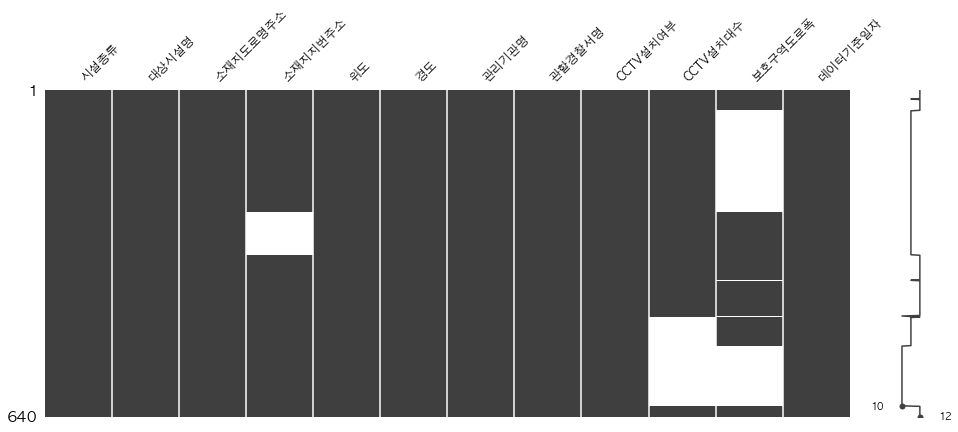

In [10]:
import missingno as msno

msno.matrix(child_zone, fontsize=12, figsize=(16,6))

- 결측치 처리 필요
- 소재지지번주소, cctv설치대수, 보호구역도로폭

In [11]:
# CCTV설치대수가 null인 데이터 필터링
null_cctv_data = child_zone[child_zone['CCTV설치대수'].isnull()]
null_cctv_data

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
442,유치원,다인유치원,대구광역시 북구 대현남로 34,대구광역시 북구 대현동 534,35.881144,128.607228,대구광역시 북구청,북부경찰서,N,NaN,NaN,2019-12-17
445,초등학교,경운초등학교,대구광역시 서구 평리로54길 16,대구광역시 서구 내당동 296,35.860880,128.552788,대구광역시 서구청,서부경찰서,Y,NaN,10,2019-09-24
446,초등학교,내서초등학교,대구광역시 서구 달구벌대로371길 35,대구광역시 서구 내당동 11-33,35.863819,128.566759,대구광역시 서구청,서부경찰서,Y,NaN,9,2019-09-24
447,유치원,내서초등학교병설유치원,대구광역시 서구 달구벌대로371길 35,대구광역시 서구 내당동 11-33,35.863819,128.566759,대구광역시 서구청,서부경찰서,Y,NaN,9,2019-09-24
448,초등학교,달서초등학교,대구광역시 서구 국채보상로34길 35,대구광역시 서구 중리동 65-2,35.866845,128.550517,대구광역시 서구청,서부경찰서,Y,NaN,26,2019-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
614,유치원,동영유치원,대구광역시 수성구 파동로51길 80(파동),대구광역시 수성구 파동 20-3,35.822376,128.608849,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27
615,어린이집,진선미어린이집,대구광역시 수성구 들안로 19길 18(상동),대구광역시 수성구 상동 15-1,35.839157,128.615443,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27
616,유치원,시지아이숲유치원,대구광역시 수성구 달구벌대로 625길 25,대구광역시 수성구 시지동 37,35.844295,128.699414,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27
617,어린이집,수성영희어린이집,대구광역시 수성구 신천동로 86길 25,대구광역시 수성구 수성동4가 1198,35.861684,128.611786,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27


#### - CCTV설치대수, 보호구역 도로폭, 소재지지번주소 삭제

## **데이터 전처리**  

현재 '사고일시', '시군구', '도로형태' 컬럼은 반복되는 패턴으로 여러 정보를 포함하고 있습니다
이런 반복되는 패턴을 일반화하면 pandas에서 제공하는 str.extract를 통해 한 번에 추출 가능합니다  

## **파생 변수 생성 1 : 날짜, 시간정보 생성**

'사고일시' 컬럼으로 부터 연도, 월, 일, 시간 정보 추출 및 변환 합니다

### 날짜 데이터 파싱하기

In [12]:
#'사고일시' 데이터 타입을 object -> datetime으로  바꾸기
train['사고일시'] = pd.to_datetime(train['사고일시'])
test['사고일시'] = pd.to_datetime(test['사고일시'])

In [13]:
train['연도'] = train.사고일시.dt.year
train['월'] = train.사고일시.dt.month
train['일'] = train.사고일시.dt.day
train['시'] = train.사고일시.dt.hour

In [14]:
test['연도'] = test.사고일시.dt.year
test['월'] = test.사고일시.dt.month
test['일'] = test.사고일시.dt.day
test['시'] = test.사고일시.dt.hour

In [15]:
display(train.head(3))
display(test.head(3))

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,연도,월,일,시
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,2019,1,1,0
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,2019,1,1,0
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,2019,1,1,1


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,연도,월,일,시
0,ACCIDENT_39609,2022-01-01 01:00:00,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람,2022,1,1,1
1,ACCIDENT_39610,2022-01-01 01:00:00,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람,2022,1,1,1
2,ACCIDENT_39611,2022-01-01 04:00:00,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차,2022,1,1,4


- 사고일시 컬럼 없애고 train_df, test_df로 명명

In [16]:
train_df = train.drop(columns=['사고일시'])
test_df = test.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연도', '월', '일', '시'], dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연도', '월', '일', '시'], dtype='object')"

## **파생 변수 생성 2 : 공간(위치) 정보 생성** 

'시군구' 컬럼으로부터 의미 있는 공산 정보를 추출 및 변환 합니다

In [17]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연도', '월', '일', '시', '도시',\n       '구', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연도', '월', '일', '시', '도시',\n       '구', '동'],\n      dtype='object')"

## **파생 변수 추출 3 : 도로 형태 정보 추출**  

'도로형태' 컬럼은 '단일로 - 기타'와 같은 패턴으로 구성되어 있습니다. 이를 두종류의 독립된 정보로 보고 두개의 컬럼으로 분리하여 생성합니다.

In [18]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연도', '월', '일', '시', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연도', '월', '일', '시', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

## **전처리 결과 확인**

지금까지 전처리한 결과를 확인해 봅시다 

In [19]:
display(train_df.head())
display(test_df.head())

,ID,요일,기상상태,노면상태,사고유형,연도,월,일,시,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,2019,1,1,4,대구광역시,동구,신암동,단일로,기타


,ID,요일,기상상태,노면상태,사고유형,연도,월,일,시,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


In [21]:
test_df

,ID,요일,기상상태,노면상태,사고유형,연도,월,일,시,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,남구,대명동,단일로,터널
10959,ACCIDENT_50568,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,수성구,시지동,단일로,기타
10960,ACCIDENT_50569,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,연호동,단일로,기타
10961,ACCIDENT_50570,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,범물동,교차로,교차로부근


In [25]:
child_zone = child_zone[['d']]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01


In [30]:
child_zone

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01


In [34]:
#소재지지번주소가 null인 데이터 필터링
child_zone[child_zone['소재지지번주소'].isnull()]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
238,초등학교,효동초교,대구광역시 동구 효동로 78-7,NaN,35.884122,128.644739,대구광역시청,대구동부경찰서,Y,2.0,6,2020-01-14
239,초등학교,율하초교,대구광역시 동구 율하동로15길 1,NaN,35.867814,128.701537,대구광역시청,대구동부경찰서,Y,2.0,6,2020-01-14
240,초등학교,반야월초교,대구광역시 동구 안심로49길 70,NaN,35.868274,128.710762,대구광역시청,대구동부경찰서,Y,2.0,6,2020-01-14
241,초등학교,동촌초교,대구광역시 동구 동촌로 168,NaN,35.882087,128.658952,대구광역시청,대구동부경찰서,Y,1.0,8,2020-01-14
242,초등학교,신천초교,대구광역시 동구 송라로6길 5,NaN,35.871649,128.621009,대구광역시청,대구동부경찰서,Y,2.0,6,2020-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
318,유치원,숲에온유치원,대구광역시 동구 신암북로 11길 11,NaN,35.888055,128.621959,대구광역시청,대구동부경찰서,Y,1.0,8,2020-01-14
319,유치원,으뜸유치원,대구광역시 동구 위남로2길 38,NaN,35.930736,128.634983,대구광역시청,대구동부경찰서,Y,1.0,6,2020-01-14
320,유치원,위즈숲유치원,대구광역시 동구 파계로19길 12-7,NaN,35.942592,128.636003,대구광역시청,대구동부경찰서,Y,1.0,6,2020-01-14
321,유치원,수피아유치원,대구광역시 동구 메디벨리로8길 11,NaN,35.884158,128.717342,대구광역시청,대구동부경찰서,Y,1.0,12,2020-01-14


In [36]:
#일단 소재지도로명주소로 해보기.....
location_pattern = r'(\S+) (\S+) (\S+)'

child_zone[['도시', '구', '동']] = child_zone['소재지도로명주소'].str.extract(location_pattern)
child_zone_df = child_zone.drop(columns=['소재지도로명주소'])

display(f"columns of child_zone_df : {child_zone_df.columns}")

"columns of child_zone_df : Index(['시설종류', '대상시설명', '소재지지번주소', '위도', '경도', '관리기관명', '관할경찰서명', 'CCTV설치여부',\n       'CCTV설치대수', '보호구역도로폭', '데이터기준일자', '도시', '구', '동'],\n      dtype='object')"

In [37]:
child_zone_df

,시설종류,대상시설명,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,도시,구,동
0,초등학교,남도초등학교,대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23,대구광역시,남구,현충동길
1,초등학교,영선초등학교,대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23,대구광역시,남구,영선길96(이천동)
2,초등학교,성명초등학교,대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23,대구광역시,남구,성당로
3,초등학교,남덕초등학교,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23,대구광역시,남구,앞산순환로
4,초등학교,대명초등학교,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23,대구광역시,남구,대명로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01,대구광역시,중구,관덕정길
636,초등학교,대구초등학교,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01,대구광역시,중구,명륜로23길
637,어린이집,대구삼성어린이집,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01,대구광역시,중구,달구벌대로
638,어린이집,동화나라어린이집,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01,대구광역시,중구,남산로3안길


#### - 어린이보호구역정보 데이터는 지번주소 데이터가 빠져있어서 외부데이터로 사용하기에는 좋아보이지 않음.